In [259]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import streamlit as sl
import pickle

import warnings
warnings.filterwarnings('ignore')

# Problem Statement
<b>Objective:<b><br>

To categorise the countries using socio-economic and health factors that determine the overall development of the country.<br><br>

<b>About organization:<b><br>

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.<br><br>

<b>Problem Statement:<b><br>

HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

# Column Name & Description
1. country	- Name of the country<br>
2. child_mort - Death of children under 5 years of age per 1000 live births<br>
3. exports- Exports of goods and services per capita. Given as %age of the GDP per capita<br>
4. health - Total health spending per capita. Given as %age of GDP per capita<br>
5. imports - Imports of goods and services per capita. Given as %age of the GDP per capita<br>
6. Income - Net income per person<br>
7. Inflation - The measurement of the annual growth rate of the Total GDP<br>
8. life_expec- The average number of years a new born child would live if the current mortality patterns are to remain the same<br>
9. total_fer - The number of children that would be born to each woman if the current age-fertility rates remain the same.<br>
10. gdpp - The GDP per capita. Calculated as the Total GDP divided by the total population.


## Read the Dataset

In [13]:
# Read the dataset
df = pd.read_csv(r"C:\Users\ACER\Downloads\Python\USL\Case Study\Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [18]:
# Lets set country as Index
df.set_index('country',inplace=True)

In [20]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [24]:
# Checking the shape of the data
print('No. of Rows:',df.shape[0])
print('No. of Columns:',df.shape[1])

No. of Rows: 167
No. of Columns: 9


In [26]:
# Understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


* There are no missing values

## Descriptive Statistics

In [32]:
# Summary statistics of the features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


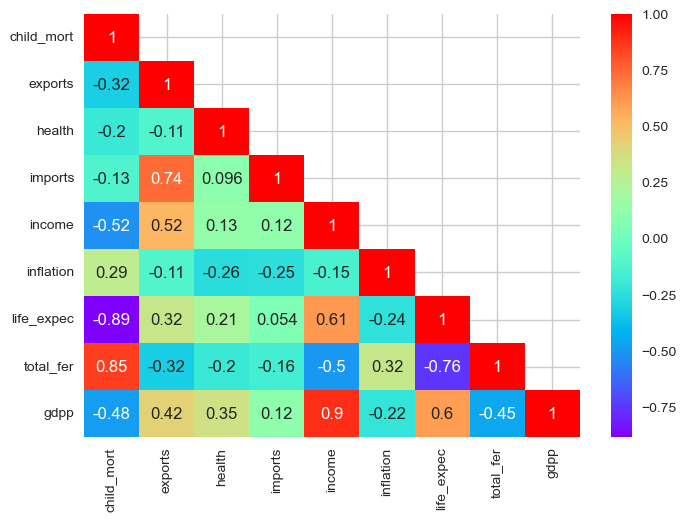

In [46]:
# Correlation between the Features
sns.heatmap(df.corr(),annot=True,cmap='rainbow',mask=np.triu(df.corr(),k=1))
plt.show()

## Visualization

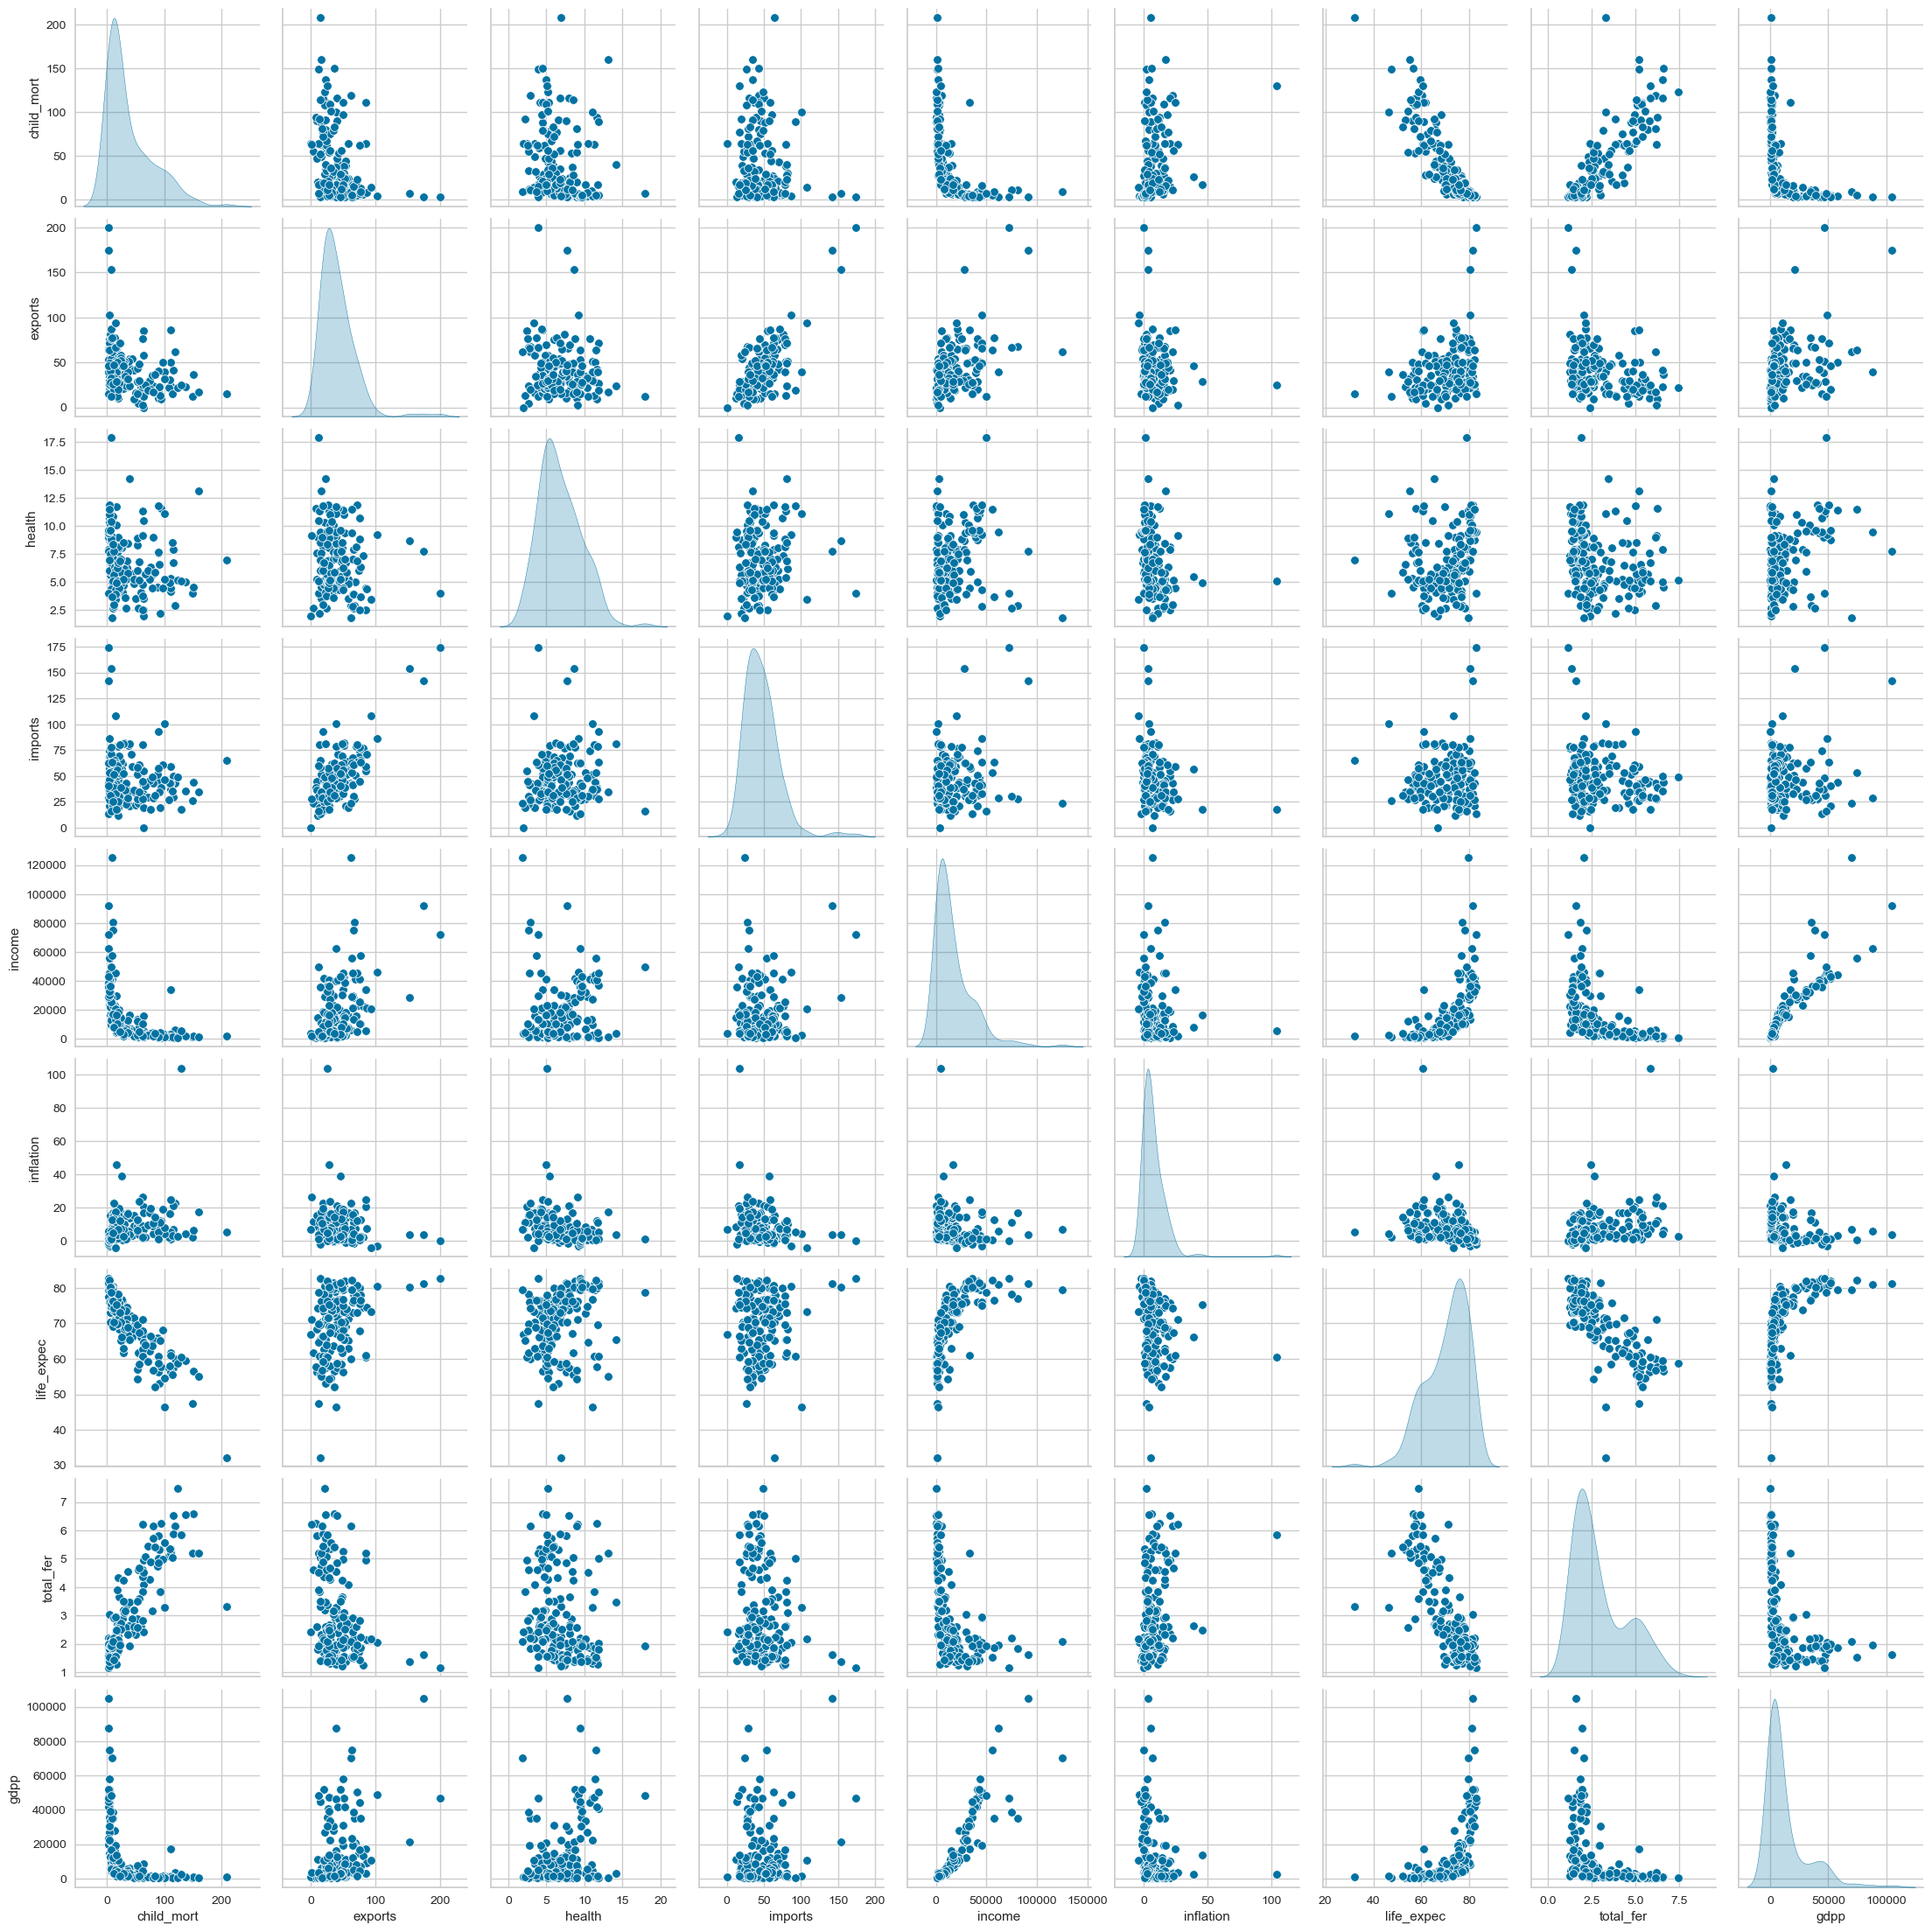

In [51]:
# Pair Plot
sns.pairplot(data=df,diag_kind='kde')
plt.show()

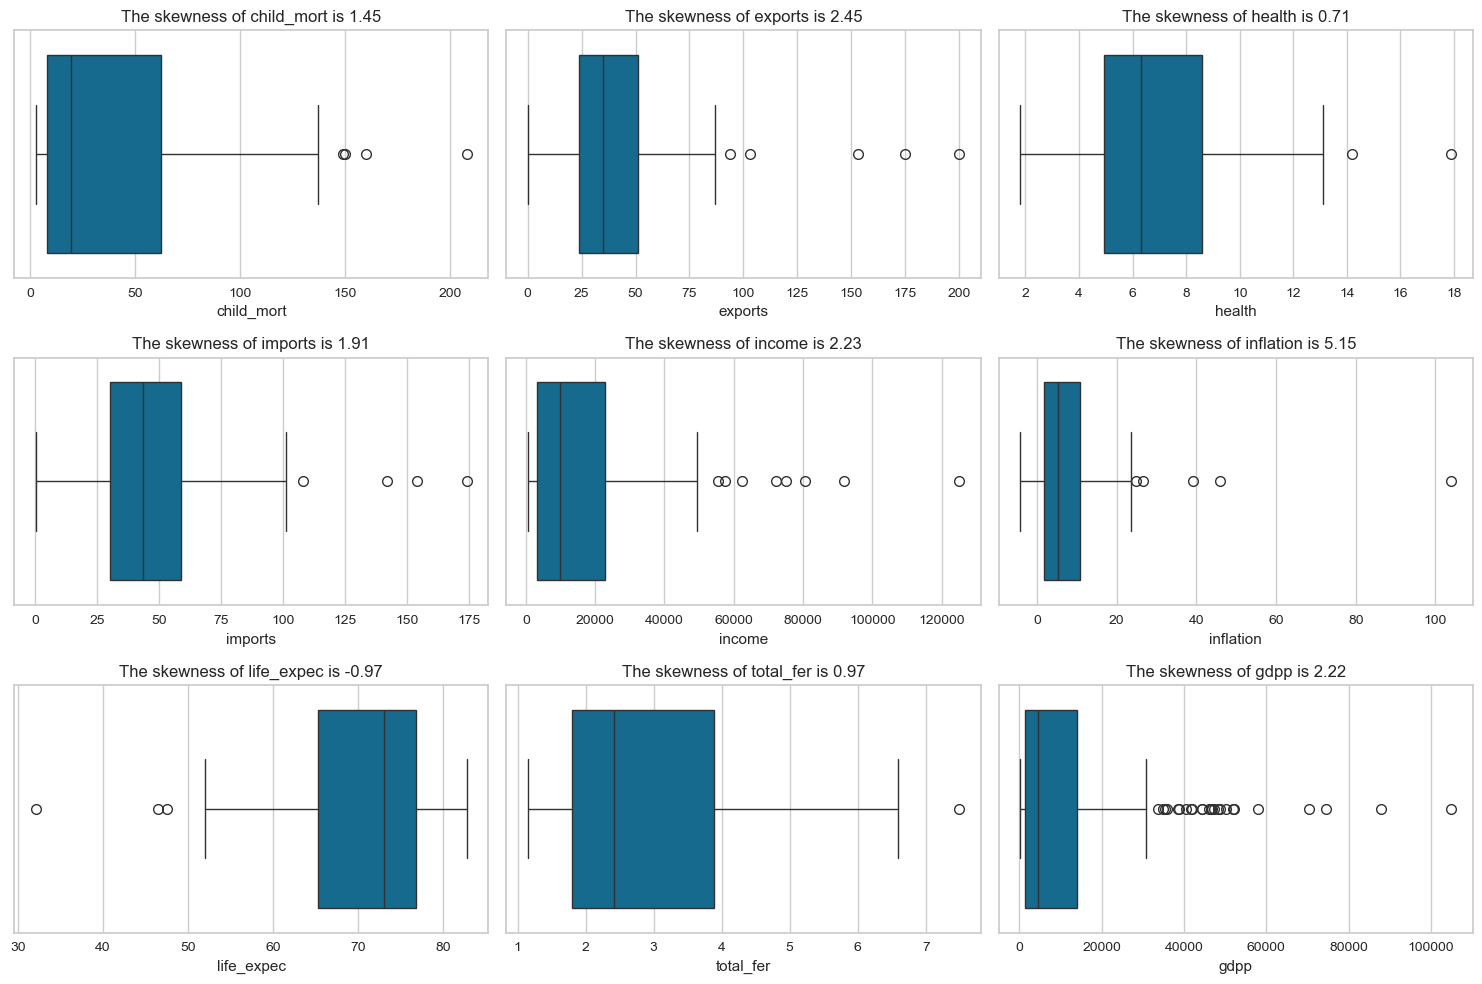

In [61]:
# Box Plot
t=1
plt.figure(figsize=[15,10])
for i in df.columns:
    plt.subplot(3,3,t)
    plt.title(f'The skewness of {i} is {round(df[i].skew(),2)}')
    sns.boxplot(x=df[i])
    t+=1

plt.tight_layout()
plt.show()

## Data Preprocessing

In [64]:
# Check for missig values
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

* No missing values

In [70]:
# Checking for duplicates
df.duplicated().sum()

0

* No duplicate rows

In [72]:
# Treatment of the outliers
# Lets cap the extreme outliers (2*IQR)

for i in df:
    q3,q1 = np.quantile(df[i],[0.75,0.25])
    iqr = q3 - q1
    ul,ll = q3+2*iqr,q1-2*iqr

    df[i] = df[i].apply(lambda x:ul if x>ul else ll if x<ll else x)

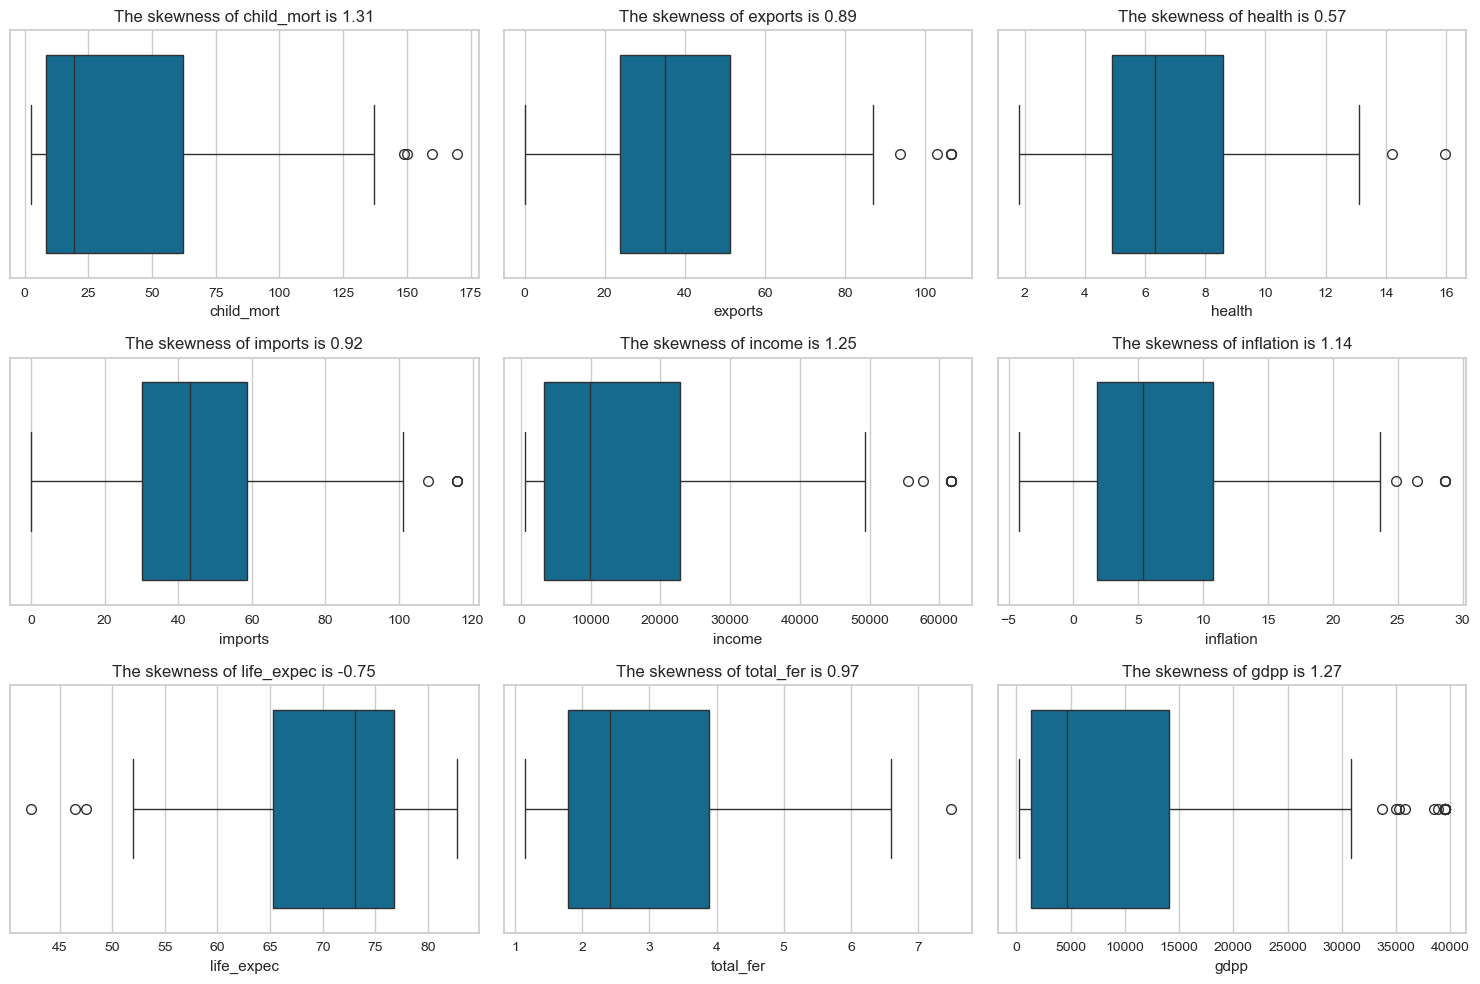

In [74]:
# Box Plot after treating the outliers
t=1
plt.figure(figsize=[15,10])
for i in df.columns:
    plt.subplot(3,3,t)
    plt.title(f'The skewness of {i} is {round(df[i].skew(),2)}')
    sns.boxplot(x=df[i])
    t+=1

plt.tight_layout()
plt.show()

In [80]:
# Scale the data.
sc = StandardScaler()
df_s = pd.DataFrame(sc.fit_transform(df),columns = df.columns)
df_s

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.325807,-1.350898,0.287879,-0.059395,-0.908259,0.327015,-1.669872,1.902882,-0.800533
1,-0.545011,-0.536547,-0.094264,0.115438,-0.394747,-0.384140,0.658280,-0.859973,-0.534220
2,-0.273031,-0.066034,-0.977272,-0.697302,-0.211439,1.283842,0.681446,-0.038404,-0.506362
3,2.057866,1.015243,-1.467008,-0.153900,-0.643479,2.188949,-1.218141,2.128151,-0.576385
4,-0.705149,0.255182,-0.287190,0.602137,0.171226,-0.822326,0.716194,-0.541946,0.076410
...,...,...,...,...,...,...,...,...,...
162,-0.224735,0.304948,-0.576579,0.309173,-0.825554,-0.652799,-0.882238,0.365754,-0.618549
163,-0.532302,-0.513926,-0.702723,-1.349384,0.010754,3.083999,0.554034,-0.316678,0.174291
164,-0.374705,1.454087,0.013330,1.608612,-0.730505,0.709171,0.287629,-0.661206,-0.743536
165,0.464112,-0.446064,-0.602550,-0.555545,-0.731122,2.361350,-0.361010,1.140944,-0.743536


## Reduce the dataset using PCA

In [83]:
# Creating instance for PCA with 9 components
pca = PCA(n_components=9)

# Fit the instance with the data
pca.fit(df_s)

PCA(n_components=9)

In [85]:
# Checking for explained variance ratio
pca.explained_variance_ratio_

array([0.48163025, 0.16586924, 0.13639048, 0.09910154, 0.0655671 ,
       0.02171641, 0.0164242 , 0.0094028 , 0.00389797])

In [87]:
# Lets decide how many PC's we can use
# Lets check Kaiser criterion first
pca.explained_variance_

array([4.36078478, 1.50181611, 1.23490898, 0.89728681, 0.59365874,
       0.1966251 , 0.14870828, 0.08513501, 0.03529306])

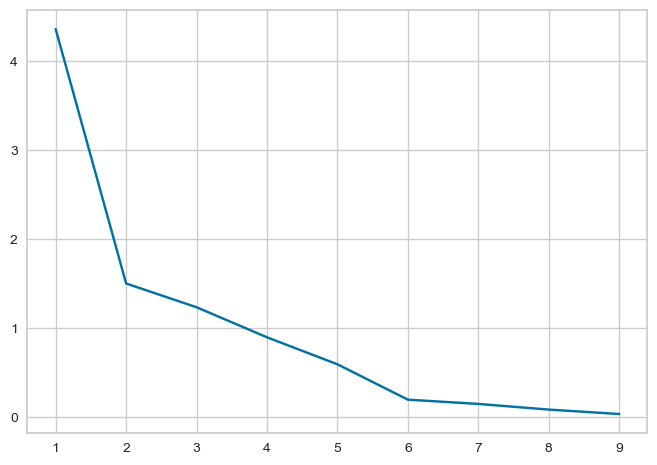

In [89]:
# Next check with Scree plot
plt.plot(range(1,10),pca.explained_variance_)
plt.show()

In [94]:
# Lets check Explained variance ratio criterion (We are going with pc's that explains at least 95% of the variance)
np.cumsum(pca.explained_variance_ratio_)

array([0.48163025, 0.6474995 , 0.78388998, 0.88299152, 0.94855862,
       0.97027503, 0.98669923, 0.99610203, 1.        ])

* Lets go with 5 number of pc's

In [145]:
# Creating instance for PCA with 5 components
pca_final = PCA(n_components=5)

# Fit the instance with the data and creating a new DataFrame
pca_data = pd.DataFrame(pca_final.fit_transform(df_s),columns = [f'PC{i}' for i in range(1,6)],index=df.index)
pca_data

,PC1,PC2,PC3,PC4,PC5
country,,,,,
Afghanistan,-3.099217,-0.232689,-0.972447,0.787536,-0.009905
Albania,0.427427,-0.285346,-0.242571,-1.377388,0.114011
Algeria,-0.411658,-0.526613,1.634043,-0.613283,0.459962
Angola,-3.217072,1.229145,1.983955,1.635771,0.159702
Antigua and Barbuda,1.189011,0.479460,-0.151955,-0.774114,-0.382475
...,...,...,...,...,...
Vanuatu,-0.851495,0.885744,-0.274273,-0.688241,-0.545222
Venezuela,-0.423297,-1.630946,2.636356,0.028650,1.674475
Vietnam,0.352164,2.013873,0.335661,-0.820898,1.339767


# K-Means Clustering on PCA data

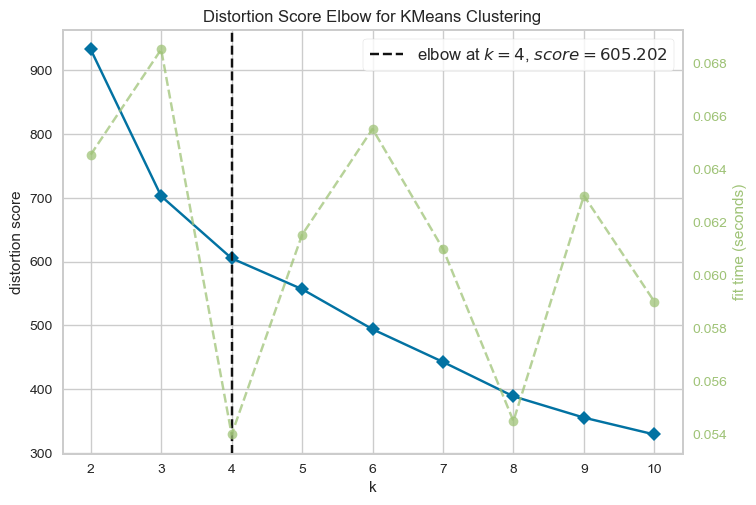

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [148]:
# Decide the value of K

#KElbow Visualizer
kelbow = KElbowVisualizer(estimator=KMeans(random_state=0),k=10)

kelbow.fit(pca_data)
kelbow.show()

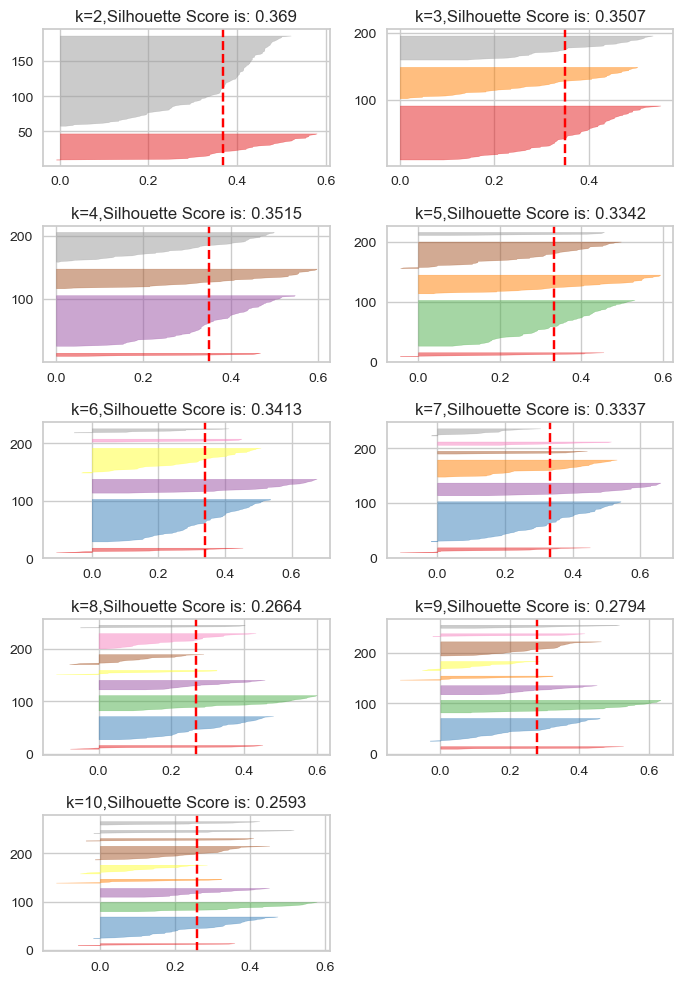

In [214]:
# Ploting the Silhoutte Visualizer to get the optimal k value
t=1
plt.figure(figsize=[7,10])
for i in range(2,11):
    plt.subplot(5,2,t)
    model=KMeans(n_clusters=i,random_state=0)
    sil_viz=SilhouetteVisualizer(model)
    sil_viz.fit(pca_data)
    plt.title(f'k={i},Silhouette Score is: {round(sil_viz.silhouette_score_,4)}')
    t+=1
plt.tight_layout()
plt.show()

* Lets go with K=3

In [153]:
# Take k = 3

kmeans_model = KMeans(n_clusters=3,random_state=0)
# Fit the model with the pca data
kmeans_model.fit(pca_data)

KMeans(n_clusters=3, random_state=0)

In [155]:
# Create a new column with cluster labels
pred = kmeans_model.predict(pca_data)
pca_data['Labels']=kmeans_model.predict(pca_data)

In [159]:
# Also create a new column in the original data so that we can have business interpretation
df['Labels'] = pred
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,1
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,0
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0


In [172]:
# Create the Centroids for the data
centroids = kmeans_model.cluster_centers_
centroids

array([[ 0.18789482,  0.09749425,  0.18668634, -0.74790798,  0.18934052],
       [-2.5308199 ,  0.10840405, -0.20904521,  0.63748954, -0.14282851],
       [ 2.86681026, -0.35670063, -0.14254351,  0.83051233, -0.23432848]])

## Visualize the CLusters

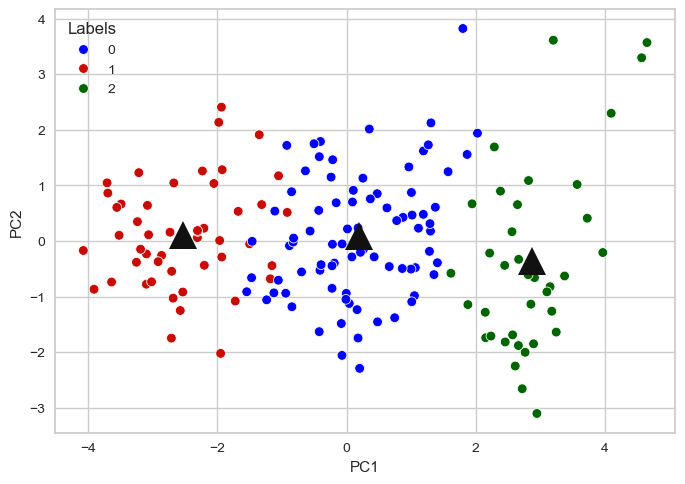

In [178]:
# We can only visualize the pca data, therfore we can visualize the PC1 and PC2
sns.scatterplot(data=pca_data,x='PC1',y='PC2',hue='Labels',palette=['blue','r','darkgreen'])
for i in range(3):
    plt.plot(centroids[i][0],centroids[i][1],marker='^',color='k',ms=20)
plt.show()

## Business Interpretation

In [200]:
# Grouping the original data with the Labels and taking the average
df.groupby('Labels').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Labels,,,,,,,,,
0,21.508537,40.797317,6.231951,48.097561,12281.097561,7.365720,72.875610,2.311707,6291.146341
1,91.570833,28.546229,6.296458,41.443040,3937.770833,10.345729,59.558333,4.953958,1902.916667
2,5.237838,52.458108,8.730541,47.971622,41360.540541,2.588432,79.956757,1.755676,34073.243243


In [204]:
# Replace the Lbales to meaningfull cluster names
df['Labels']=df['Labels'].map({0:'Developing',1:'Underdeveloped',2:'Developed'})

In [206]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,Underdeveloped
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Developing
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,Developing
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,Underdeveloped
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,Developing
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0,Developing
Venezuela,17.1,28.5,4.91,17.6,16500.0,28.63,75.4,2.47,13500.0,Developing
Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0,Developing


In [208]:
# Developed Countries
df[df['Labels']=='Developed'].index

Index(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Brunei',
       'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
       'United Kingdom', 'United States'],
      dtype='object', name='country')

In [210]:
# Developing Countries
df[df['Labels']=='Developing'].index

Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia',
       'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
       'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles',
       'Solomon Islands', 'Sri Lanka', 'St. Vincent and the Grenadines',
       'Suriname', 'Tajikistan', '

In [212]:
# Under Developed Countries
df[df['Labels']=='Underdeveloped'].index

Index(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar',
       'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste',
       'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype='object', name='country')

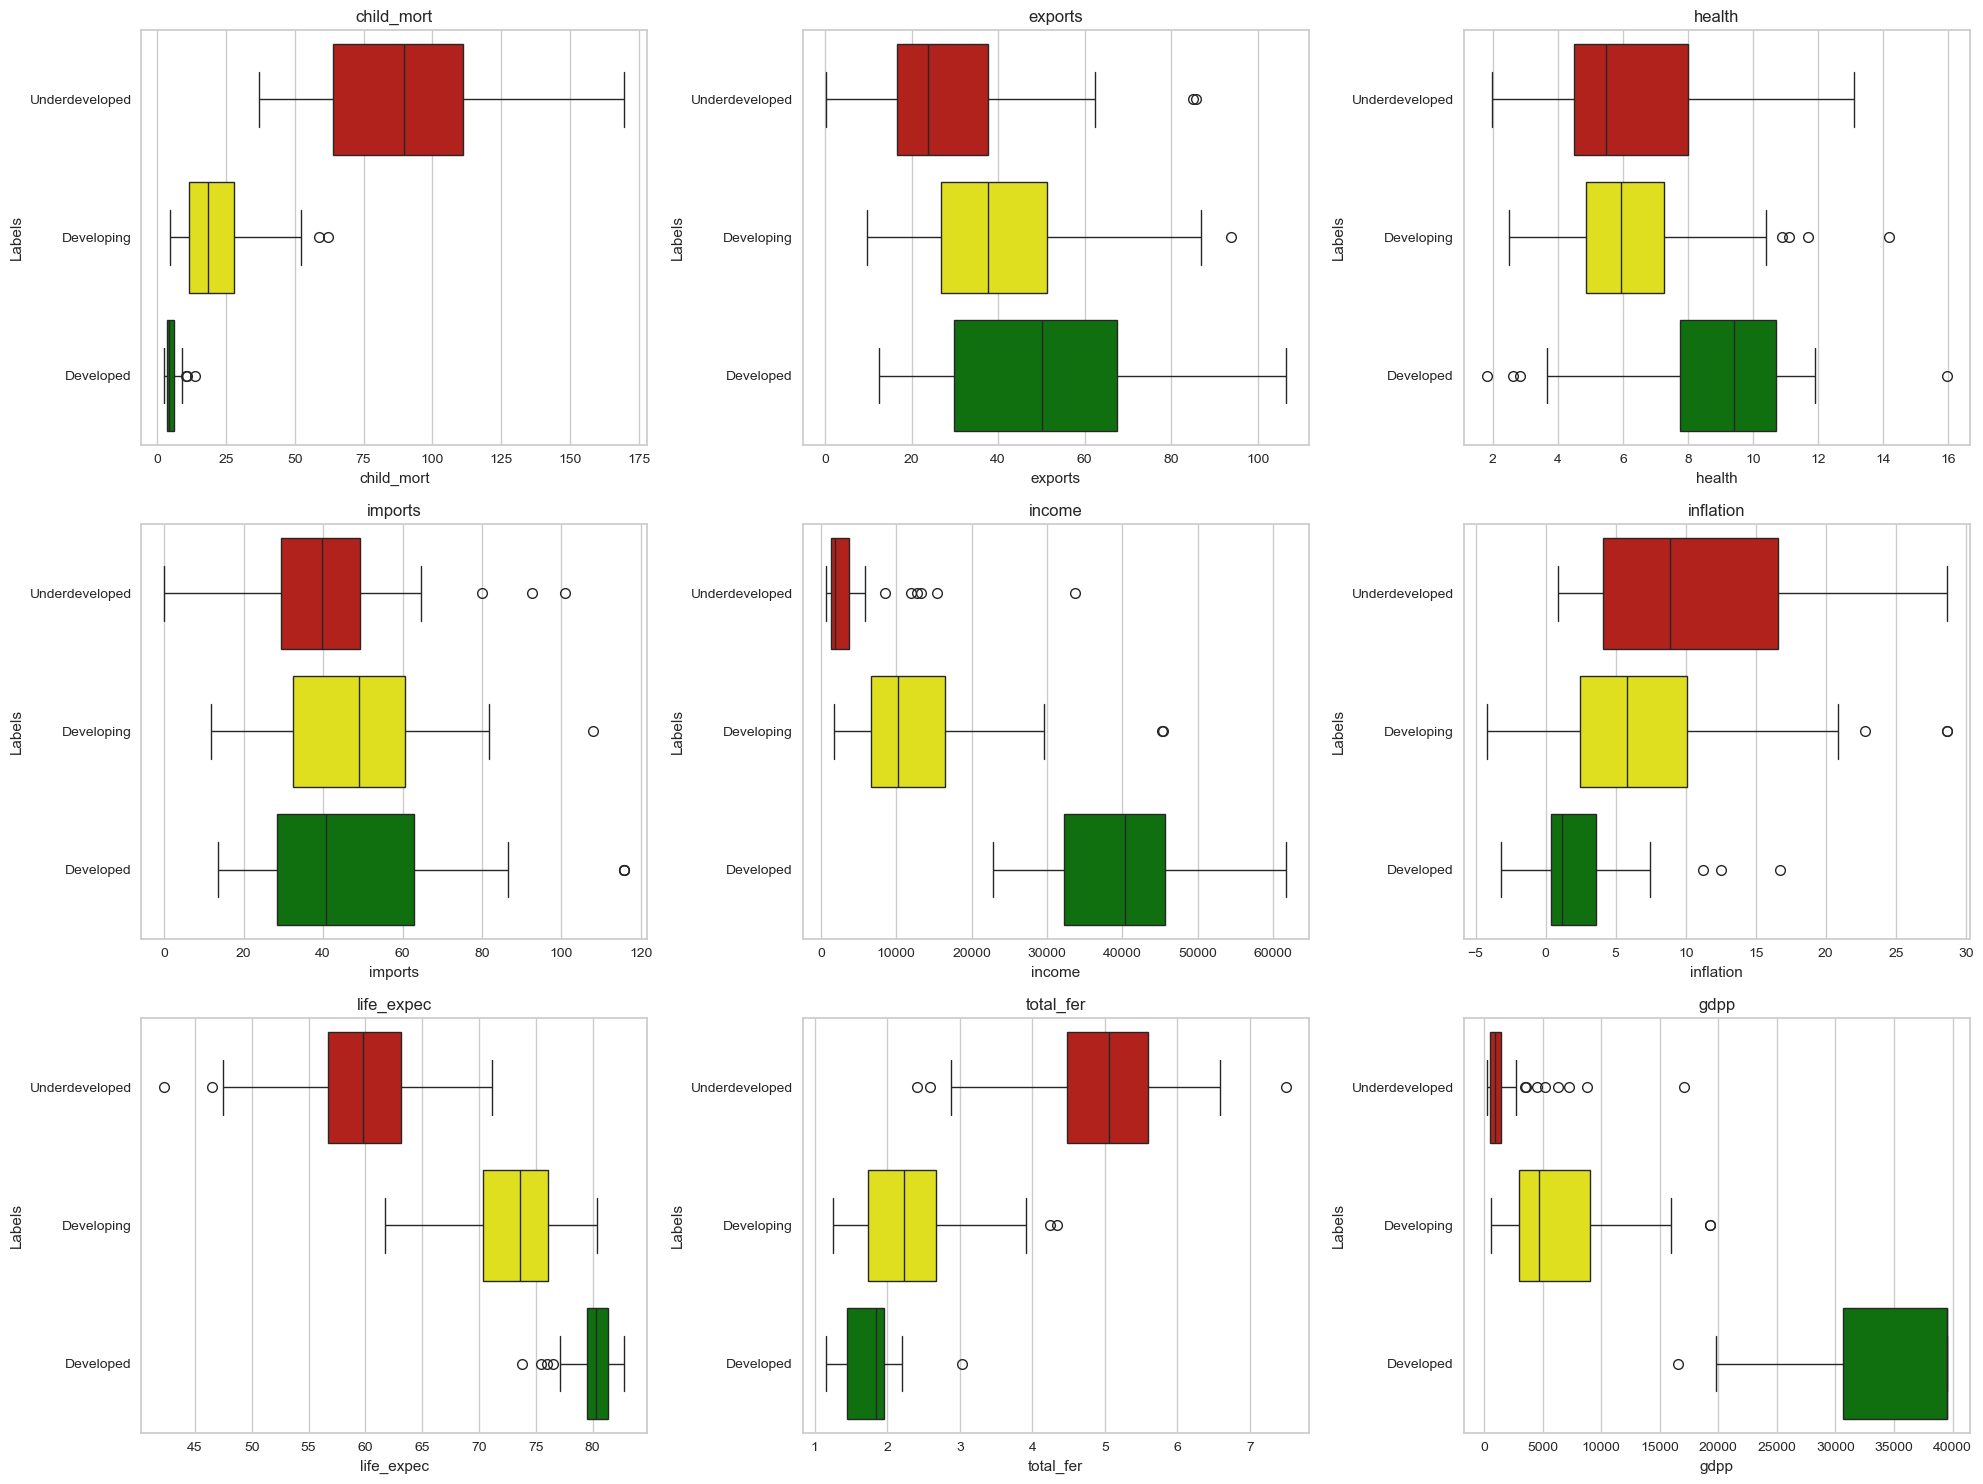

In [228]:
t = 1
plt.figure(figsize=[20,15])
for i in df.select_dtypes(np.number):
    plt.subplot(3,3,t)
    plt.title(i)
    sns.boxplot(x=df[i],y=df['Labels'],palette=['r','yellow','green'])
    t+=1

plt.tight_layout()
plt.show()

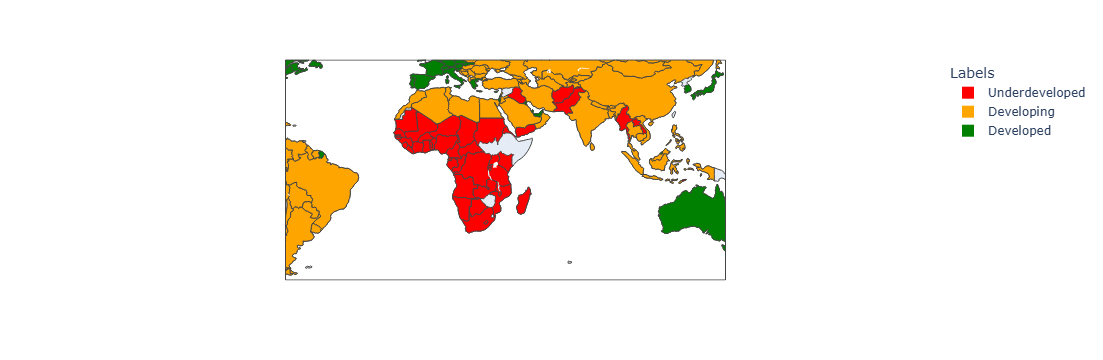

In [248]:
# Plot the Labels in a Map with corresponding countries
px.choropleth(data_frame=df,locationmode='country names',locations=df.index,color=df.Labels,
             color_discrete_map={'Underdeveloped':'red','Developing':'orange','Developed':'green'})

In [ ]:
# From this we can separate countries like developed,under developed and developing.
# And the Institution can allocate funds or focus more on under developed countries then developing countries.

## Deployment

In [261]:
# Create a pickle of fitted model

with open('KMeans_model.pkl','wb') as file:
    pickle.dump(kmeans_model,file)

In [274]:
# Create a pickle of standard Scaler and PCA

with open('pcal_final.pkl','wb') as file:
    pickle.dump(pca_final,file)

with open('Scaler.pkl','wb') as file:
    pickle.dump(sc,file)